In [1]:
# Question 1 

In [2]:
def answer_one():
    import pandas as pd
    import numpy as np
    import re
    import functools 
    
    energy = pd.read_excel('Energy Indicators.xls', skiprows = 17, skip_footer = 38, parse_cols = range(1, 6), index_col = None, names = ["Country", "Energy Supply", "Energy Supply per Capita", "% Renewable"], na_values='...')
    energy.replace('...', np.nan, inplace=True)
    energy['Energy Supply'] *= 1000000
    energy['Country'] = energy['Country'].apply(lambda x: re.sub(r'\(.*\)', '', x))
    energy['Country'] = energy['Country'].apply(lambda x: x.split(' (')[0])
    energy['Country'] = energy['Country'].map(lambda x: x.strip())
    energy['Country'] = energy['Country'].str.replace("[0-9()]+$", "")
    energy.replace('Republic of Korea', 'South Korea', inplace=True)
    energy.replace('United States of America', 'United States', inplace=True)
    energy.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)
    energy.replace('China, Hong Kong Special Administrative Region', 'Hong Kong', inplace=True)


    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    GDP.replace('Korea, Rep.', 'South Korea', inplace=True)
    GDP.replace('Iran, Islamic Rep.', 'Iran', inplace=True)
    GDP.replace('Hong Kong SAR, China', 'Hong Kong', inplace=True)
    GDP.rename(columns={'Country Name':'Country'}, inplace=True)
    GDP = GDP[['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

    ScimEn = pd.read_excel('scimagojr-3.xlsx')

    tdf = pd.merge(ScimEn, energy, how = 'inner', left_on = 'Country', right_on = 'Country')
    tdf = pd.merge(tdf, GDP, how = 'inner', left_on = 'Country', right_on = 'Country')
    df = tdf[tdf['Rank']<=15]
    df = df.set_index('Country', inplace=False)
    return df
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [3]:
# Question 2

In [83]:
def answer_two():   
    import pandas as pd
    import numpy as np
    import re
    import functools 
    
    energy = pd.read_excel('Energy Indicators.xls', skiprows = 17, skip_footer = 38, parse_cols = range(1, 6), index_col = None, names = ["Country", "Energy Supply", "Energy Supply per Capita", "% Renewable"], na_values='...')
    energy.replace('...', np.nan, inplace=True)
    energy['Energy Supply'] *= 1000000
    energy['Country'] = energy['Country'].apply(lambda x: re.sub(r'\(.*\)', '', x))
    energy['Country'] = energy['Country'].apply(lambda x: x.split(' (')[0])
    energy['Country'] = energy['Country'].map(lambda x: x.strip())
    energy['Country'] = energy['Country'].str.replace("[0-9()]+$", "")
    energy.replace('Republic of Korea', 'South Korea', inplace=True)
    energy.replace('United States of America', 'United States', inplace=True)
    energy.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)
    energy.replace('China, Hong Kong Special Administrative Region', 'Hong Kong', inplace=True)


    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    GDP.replace('Korea, Rep.', 'South Korea', inplace=True)
    GDP.replace('Iran, Islamic Rep.', 'Iran', inplace=True)
    GDP.replace('Hong Kong SAR, China', 'Hong Kong', inplace=True)
    GDP.rename(columns={'Country Name':'Country'}, inplace=True)
    GDP = GDP[['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

    ScimEn = pd.read_excel('scimagojr-3.xlsx')

    tdf = pd.merge(ScimEn, energy, how = 'inner', left_on = 'Country', right_on = 'Country')
    tdf = pd.merge(tdf, GDP, how = 'inner', left_on = 'Country', right_on = 'Country')
    df = tdf[tdf['Rank']<=15]
    df = df.set_index('Country', inplace=False)
    tdf_in = (pd.merge(GDP, energy, how = 'inner', on = 'Country'))
    tdf_in = (pd.merge(tdf_in, ScimEn, how = 'inner', on = 'Country'))
    tdf_out = (pd.merge(GDP, energy, how ='outer', on = 'Country'))
    tdf_out = (pd.merge(tdf_out, ScimEn, how ='outer', on = 'Country'))  
    return len(tdf_out) - len(tdf_in)
answer_two()

158

In [5]:
# Question 3

In [84]:
def answer_three():
    import pandas as pd
    Top15 = answer_one()
    avgGDP = Top15[['2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1).rename('avgGDP').sort_values(ascending = False)
    return pd.Series(avgGDP)
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [ ]:
# Question 4

In [85]:
def answer_four():
    Top15 = answer_one()
    Top15_Change = Top15['2015'] - Top15['2006']
    return Top15_Change.loc['United Kingdom']
answer_four()

246702696075.3999

In [ ]:
# Question Five

In [3]:
def answer_five():
    import pandas as pd
    Top15 = answer_one()
    avgESP = Top15['Energy Supply per Capita'].mean(axis = 0)
    return avgESP
answer_five()

157.6

In [ ]:
# Question Six

In [87]:
def answer_six():
    Top15 = answer_one()
    PctRenew = Top15['% Renewable'].idxmax(), Top15['% Renewable'].max()
    return PctRenew
answer_six()

('Brazil', 69.648030000000006)

In [ ]:
# Question Seven

In [88]:
def answer_seven():
    Top15 = answer_one()
    Top15['Citations %'] = (Top15['Self-citations'] / Top15['Citations'])
    PctCitations = Top15['Citations %'].idxmax(), Top15['Citations %'].max()
    return PctCitations
answer_seven()

('China', 0.68931261793894216)

In [ ]:
# Question Eight

In [89]:
def answer_eight():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    return Top15.sort_values(by = 'PopEst', ascending = False).iloc[2].name
answer_eight()

'United States'

In [ ]:
# Question Nine

In [90]:
def answer_nine():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = (Top15['Citable documents']) / Top15['PopEst']
    Top15['Citable docs per Capita']=np.float64(Top15['Citable docs per Capita'])
    return Top15[['Citable docs per Capita', 'Energy Supply per Capita']].corr().values[0, -1]
answer_nine()

0.79400104354429435

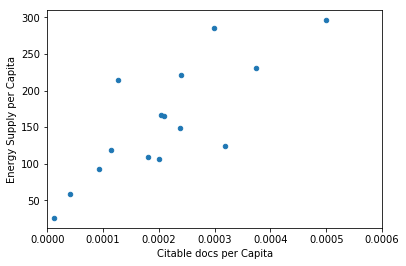

In [30]:
def plot9():
    import pandas as pd
    import numpy as np
    
    import matplotlib as plt
    
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15['Citable docs per Capita']=np.float64(Top15['Citable docs per Capita'])
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
# Comment: I am 79% confident that energy supply per capita has a direct impact on research and consequently on citable documents per capita
#plot9()

In [ ]:
# Question 10

In [91]:
def answer_ten():
    Top15 = answer_one()
    RenMed = Top15['% Renewable'].median()
    Top15['HighRenew'] = Top15['% Renewable'] >= RenMed
    Top15['HighRenew'] = Top15['HighRenew'].apply(lambda x:1 if x else 0).sort_values(ascending = False)
    return Top15['HighRenew']
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [ ]:
# Question 11

In [92]:
def answer_eleven():
    import pandas as pd
    import numpy as np
    
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    ctrygroups = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    for group, frame in Top15.groupby(ContinentDict):
        ctrygroups.loc[group] = [len(frame), frame['PopEst'].sum(),frame['PopEst'].mean(),frame['PopEst'].std()]
    return ctrygroups
answer_eleven()

,size,sum,mean,std
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [ ]:
# Answer Twelve

In [93]:
def answer_twelve():
    import pandas as pd
    import numpy as np
    
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15["Continent"] = Top15.index.map(lambda x: ContinentDict[x])
    group = Top15["Continent"]    
    return Top15.groupby(["Continent",pd.cut(Top15['% Renewable'], 5,labels=["bin{0}".format(bin) for bin in range(5)])]
    )['% Renewable'].count()
answer_twelve()

Continent      % Renewable
Asia           bin0           4
               bin1           1
Australia      bin0           1
Europe         bin0           1
               bin1           3
               bin2           2
North America  bin0           1
               bin4           1
South America  bin4           1
Name: % Renewable, dtype: int64

In [ ]:
# Answer Thirteen

In [94]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    return (Top15['PopEst'].map(lambda x: "{0:,}".format(x)))
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object